In [265]:
import os
import sys
from PIL import Image, ExifTags
import pprint
import requests
from collections import defaultdict
import glob
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import operator
import datetime
import pandas as pd
from math import pi
import re

<h1>1 Part(a)</h1>

In [266]:
def func_name(name):
    MAC_URL = 'http://macvendors.co/api/%s'
    r = requests.get(MAC_URL % name)
#     pprint.pprint(r.json())
    
    return (r.json()['result']['company'])

In [282]:
company = defaultdict(lambda : 0)
company1 = defaultdict(lambda : 0)


directory = './Isis Admin\'s Hacked Phones/'


for file in os.listdir(directory):
    first_level = directory + file
    for files in os.listdir(first_level):
        second_level = first_level + "/" + files
        for f in os.listdir(second_level):
            found = 0
            
            if f.endswith("Snapshots") or f.endswith("snapshots") or f.endswith("snapshot") or f.endswith("Snapshot") :
                third_level = second_level+"/" + f
                for filess in os.listdir(third_level):
                    try:
                        img = Image.open(os.path.join(third_level, filess))
                        exif = { ExifTags.TAGS[k]: v for k, v in img._getexif().items() if k in ExifTags.TAGS }
                        if(exif["Make"]):
                            company[exif["Make"].rstrip('\x00').lower()] += 1
                            found = 1
                        else:
                            company["Unknown"] += 1
                            found =1 
                        break
                    except:
                        
                        f = open(os.path.join(second_level,"ifconfig.txt"))
                        name = func_name((" ").join(f.readlines()).split("Name         : wlan0 - wlan0")[1].split("IPv4 Address")[0].split(": ")[1].strip("\n "))
                        if re.search('epigram',name.split(" (")[0].lower()) != 1:
                            company[name.split(" (")[0].lower()] += 1
                        found = 1
                        break
                break
            
            elif f == "ifconfig.txt" or f == "ifconfig" and found == 0:
                fo = open(os.path.join(second_level, f))
                

                try:
                    var = (" ").join(fo.readlines()).split("Name         : wlan0 - wlan0")[1].split("IPv4 Address")[0].split(": ")[1].strip("\n ")
                    if len(var) == 17:
                        name = func_name(var)
                        
                        if name != 'Epigram, Inc.':
                            company[name.split(" (")[0].lower()] += 1
                    elif len(var) == 55:
                        name = func_name(var.split("\n")[0])
                        
                        if name != 'Epigram, Inc.':
                            company[name.split(" (")[0].lower()] += 1
                except:
                    pass


for i in company:
    if len(i.split(" ")) > 1:
        company1[i.split()[0]]+= company[i]
    else:
        company1[i] = company[i]
company1['samsung'] += 1

<h1>1 Part(b)</h1>

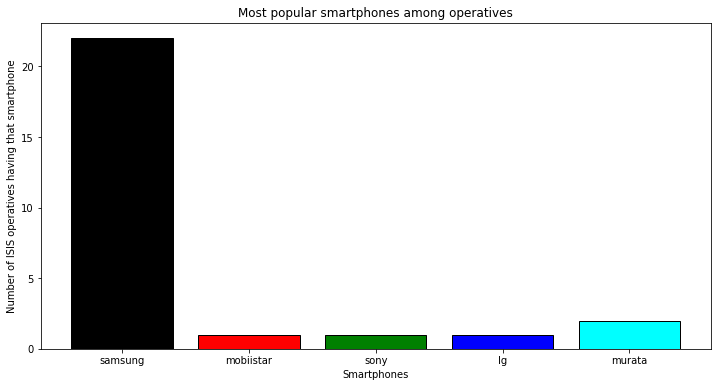

In [285]:
figure(figsize=(12,6))
company1['lg'] -=2
plt.bar(company1.keys(), company1.values(), align='center',color=['black', 'red', 'green', 'blue', 'cyan'],edgecolor='black')
plt.title('Most popular smartphones among operatives')
plt.xlabel("Smartphones")
plt.ylabel("Number of ISIS operatives having that smartphone")
plt.show()


In [377]:
import re
log_list = []
outgoing = defaultdict(lambda: 0)
incoming = defaultdict(lambda: 0)
# num_dict
for root, dirs, files in os.walk(directory):
    for file in files:
        if file.endswith(".txt"):
            name = os.path.join(root,file)
            if re.search('Calllog',name):
                log_list.append(name)

                
for files in log_list:
    f = open(files)
    var = ''.join(f.readlines()).split("\n")
    for idx, val in enumerate(var):
        if val.startswith("Number"):
            if var[idx+3].strip("\n").split(": ")[1].lower() == 'outgoing':
                country = f.name.split("/")[2].split(" ")[0]
                index = (var[idx].strip("\n").split(": ")[1],var[idx+1].strip("\n").split(": ")[1].lower(),country)
                outgoing[index] += 1
            
            if var[idx+3].strip("\n").split(": ")[1].lower() == 'incoming':
                country = f.name.split("/")[2].split(" ")[0]
                index = (var[idx].strip("\n").split(": ")[1],var[idx+1].strip("\n").split(": ")[1].lower(),country)
                incoming[index] += 1



In [16]:
arr = sorted(outgoing.items(), key=operator.itemgetter(1))[-5:]
arr1 = sorted(incoming.items(), key=operator.itemgetter(1))[-5:]

print("Top 5 most popular outgoing numbers are :")
for key,value in arr:
    
    print("Number : " + key[0] + " Name : " + key[1] + " Country : " + key[2] + " ==> " + str(value))
    



Top 5 most popular outgoing numbers are :
Number : 123 Name : null Country : India ==> 215
Number : +917780809871 Name : adal bhat Country : India ==> 237
Number : 0933637039 Name : جدي ندى Country : Turkey ==> 250
Number : 00966550326715 Name : null Country : Yemen ==> 264
Number : 0997421993 Name : هتلر Country : Syria ==> 300


<h1>1 Part(c)</h1>

In [17]:
print("Top 5 most popular incoming numbers are :")
for key,value in arr1:
    
    print("Number : " + key[0] + " Name : " + key[1] + " Country : " + key[2] + " ==> " + str(value))
    

Top 5 most popular incoming numbers are :
Number : Abili Name : null Country : Syria ==> 110
Number : +917780848045 Name : musaib dhurani Country : India ==> 159
Number : +963997421993 Name : هتلر Country : Syria ==> 222
Number : MTN Name : null Country : Syria ==> 363
Number : Syriatel Name : null Country : Syria ==> 622


<h1>1 Part(d)</h1>

In [207]:
rel_list = []
countries = ['yemen','syria','india']
for root, dirs, files in os.walk(directory):
    
    for file in files:
        if file.endswith(".txt"):
            name = os.path.join(root,file)
            country = name.split("/")[2].split(" ")[0]
            if re.search('Calllog',name) and (country.lower() in countries):
                rel_list.append(name)

time = []   
for files in rel_list:
    f = open(files)
    country = f.name.split("/")[2].split(" ")[0]
    var = ''.join(f.readlines()).split("\n")
    for idx, val in enumerate(var):
        if val.startswith("Date"):
            try:
                time.append((country,val.split(" ")[4]))
            except:
                pass


In [208]:
india = {0:0,1:0,2:0,3:0,4:0,5:0,6:0,7:0,8:0,9:0,10:0,11:0,12:0,13:0,14:0,15:0,16:0,17:0,18:0,19:0,20:0,21:0,22:0,23:0}
yemen = {0:0,1:0,2:0,3:0,4:0,5:0,6:0,7:0,8:0,9:0,10:0,11:0,12:0,13:0,14:0,15:0,16:0,17:0,18:0,19:0,20:0,21:0,22:0,23:0}
syria = {0:0,1:0,2:0,3:0,4:0,5:0,6:0,7:0,8:0,9:0,10:0,11:0,12:0,13:0,14:0,15:0,16:0,17:0,18:0,19:0,20:0,21:0,22:0,23:0}

for var in time:
    if var[0].lower() == 'india':
        times = var[1].split(":")
        times = [int(x) for x in times]
        temp = datetime.timedelta(hours=times[0], minutes=times[1], seconds=times[2]) + datetime.timedelta(hours=5, minutes=30)
        if str(temp).startswith("1 day"):
            india[int(str(temp).split(", ")[1].split(":")[0])] += 1
        else:
            india[int(str(temp).split(":")[0])] += 1
    elif var[0].lower() == 'syria':
        times = var[1].split(":")
        times = [int(x) for x in times]
        temp = datetime.timedelta(hours=times[0], minutes=times[1], seconds=times[2]) + datetime.timedelta(hours=2)
        if str(temp).startswith("1 day"):
            syria[int(str(temp).split(", ")[1].split(":")[0])] += 1
        else:
            syria[int(str(temp).split(":")[0])] += 1
    elif var[0].lower() == 'yemen':
        times = var[1].split(":")
        times = [int(x) for x in times]
        temp = datetime.timedelta(hours=times[0], minutes=times[1], seconds=times[2]) + datetime.timedelta(hours=3)
        if str(temp).startswith("1 day"):
            yemen[int(str(temp).split(", ")[1].split(":")[0])] += 1
        else:
            yemen[int(str(temp).split(":")[0])] += 1
            

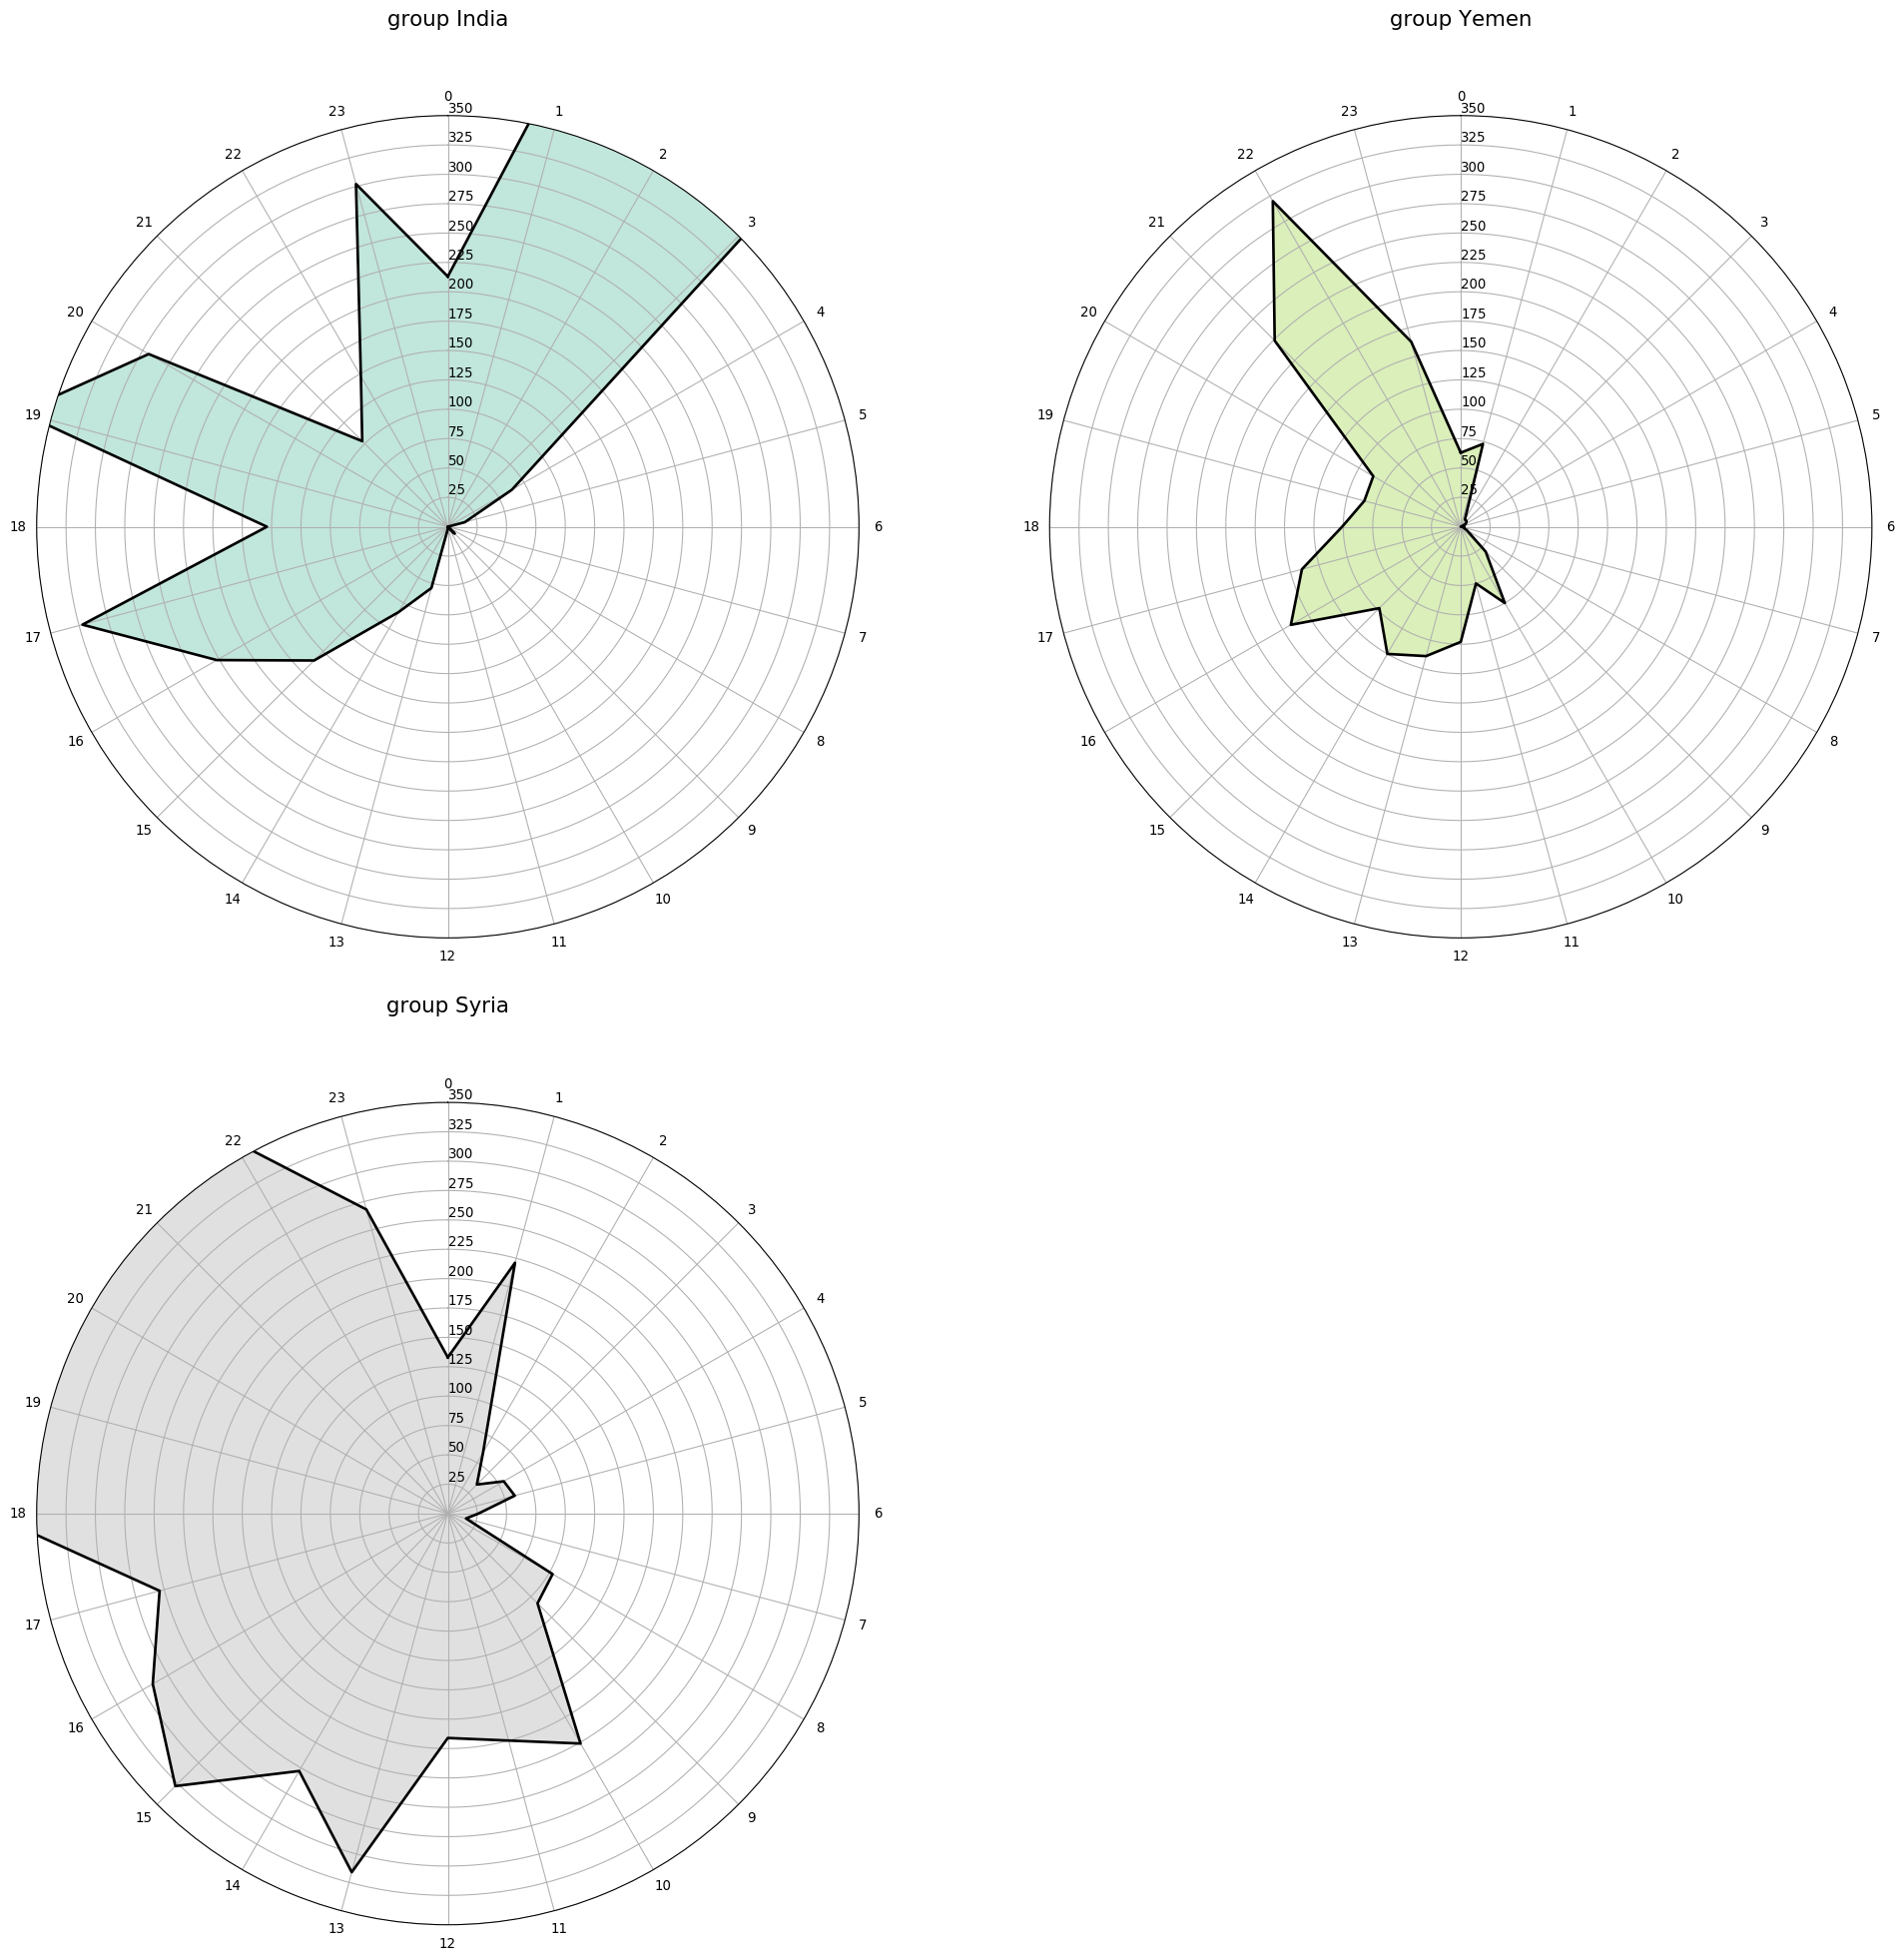

In [400]:
# Set data

df = pd.DataFrame({
'group': ['India','Yemen','Syria'],
'0':  [india[0],yemen[0],syria[0]],
'1':  [india[1],yemen[1],syria[1]],
'2':  [india[2],yemen[2],syria[2]],
'3':  [india[3],yemen[3],syria[3]],
'4':  [india[4],yemen[4],syria[4]],
'5':  [india[5],yemen[5],syria[5]],
'6':  [india[6],yemen[6],syria[6]],
'7':  [india[7],yemen[7],syria[7]],
'8':  [india[8],yemen[8],syria[8]],
'9':  [india[9],yemen[9],syria[9]],
'10':  [india[10],yemen[10],syria[10]],
'11':  [india[11],yemen[11],syria[11]],
'12':  [india[12],yemen[12],syria[12]],
'13':  [india[13],yemen[13],syria[13]],
'14':  [india[14],yemen[14],syria[14]],
'15':  [india[15],yemen[15],syria[15]],
'16':  [india[16],yemen[16],syria[16]],
'17':  [india[17],yemen[17],syria[17]],
'18':  [india[18],yemen[18],syria[18]],
'19':  [india[19],yemen[19],syria[19]],
'20':  [india[20],yemen[20],syria[20]],
'21':  [india[21],yemen[21],syria[21]],
'22':  [india[22],yemen[22],syria[22]],
'23':  [india[23],yemen[23],syria[23]],

})
 
 
 
# ------- PART 1: Define a function that do a plot for one line of the dataset!
 
def make_spider( row, title, color):
 
    # number of variable
    categories=list(df)[1:]
    N = len(categories)

    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    # Initialise the spider plot
    ax = plt.subplot(2,2,row+1, polar=True, )

    # If you want the first axis to be on top:
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)

    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories, color='black', size=10)

    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks([25,50,75,100,125,150,175,200,225,250,275,300,325,350,375], ["25","50","75","100","125","150","175","200","225","250","275","300","325","350","375"], color="black", size=10)
    plt.ylim(0,350)

    # Ind1
    values=df.loc[row].drop('group').values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, color='Black', linewidth=2, linestyle='solid')
    ax.fill(angles, values, color=color, alpha=0.4)

    # Add a title
    plt.title(title, size=16, color='Black', y=1.1)

# ------- PART 2: Apply to all individuals
# initialize the figure
my_dpi=96
plt.figure(figsize=(25,25), dpi=my_dpi)

# Create a color palette:
my_palette = plt.cm.get_cmap("Set2", len(df.index))

# Loop to plot
for row in range(0, len(df.index)):
    make_spider( row=row, title='group '+df['group'][row], color=my_palette(row))




In [401]:
df

,group,0,1,2,3,4,5,6,7,8,...,14,15,16,17,18,19,20,21,22,23
0,India,213,447,608,417,63,15,0,0,0,...,84,161,227,322,154,377,294,103,148,302
1,Yemen,63,73,7,7,5,0,3,2,6,...,125,98,167,140,101,85,86,224,320,163
2,Syria,133,221,60,35,55,59,26,16,103,...,253,328,290,254,390,413,595,446,367,268


<h1>1 Part(e)</h1>

In [36]:
total_calls = []
duration = defaultdict(lambda: 0)
total = defaultdict(lambda: 0)
for root, dirs, files in os.walk(directory):
    for file in files:
        if file.endswith(".txt"):
            name = os.path.join(root,file)
            if re.search('Calllog',name):
                total_calls.append(name)

                
for files in total_calls:
    f = open(files)
    country = f.name.split("/")[2].split(" ")[0]
    var = ''.join(f.readlines()).split("\n")
    for idx, val in enumerate(var):
        if val.startswith("Duration"):
            try:
                duration[country] += int(val.split(": ")[1])
                total[country] += 1
            except:
                pass
average = {}
for key in duration:
    
    average[key] = duration[key]/total[key]

[]

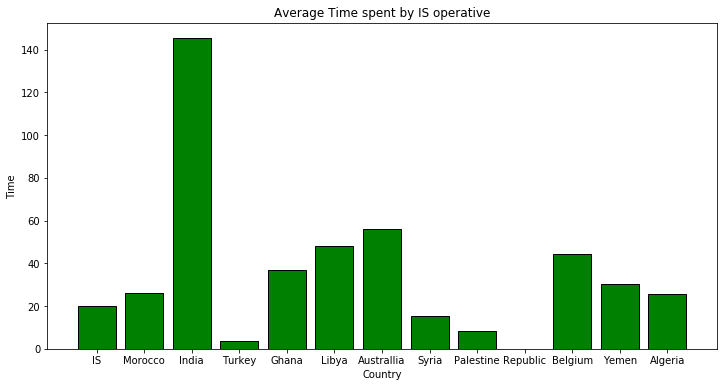

In [37]:
figure(figsize=(12,6))
plt.bar(average.keys(), average.values(), align='center',color='green',edgecolor='black')
plt.title('Average Time spent by IS operative')
plt.xlabel("Country")
plt.ylabel("Time")
plt.plot()

[]

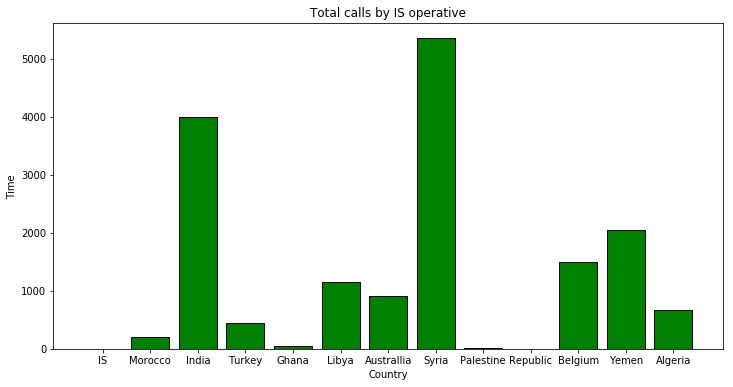

In [38]:
figure(figsize=(12,6))
plt.bar(total.keys(), total.values(), align='center',color='green',edgecolor='black')
plt.title('Total calls by IS operative')
plt.xlabel("Country")
plt.ylabel("Time")
plt.plot()

<h1> Question 2 Part(a)</h1>

In [227]:
FILENAME_DATASET = 'savry_2017.csv'

df = pd.read_csv(FILENAME_DATASET, sep='\t', index_col=False)
df.head()

,gender,nationality,main_crime_age,criminal_records,main_crime_category,main_crime_is_violent,risk01_previous_violence,risk02_history_nonviolent_offences,risk03_early_violence_before_14,risk04_past_intervention_fail,...,sum_social_risk_items,sum_individual_risk_items,sum_all_risk_items,sum_all_protective_items,professional_risk_evaluation,recidivism,recidivism_number_offences,recidividm_category_first_offence,recidivism_violence_first_offence,recidivism_severity
0,Male,Spanish,17,1 or 2 criminal records,Nonviolent against property,No violent,Moderate,Moderate,Low,Low,...,3,5,12,1,Low,No,0,Not applicable,Not applicable,0
1,Male,Spanish,17,3 to 5 criminal records,Against persons,Violent,Moderate,Moderate,Low,Moderate,...,5,6,19,4,Moderate,Yes,1,Others,No violent,1
2,Male,Foreigner,16,1 or 2 criminal records,Nonviolent against property,No violent,Low,Low,Low,Low,...,4,1,9,3,Low,No,0,Not applicable,Not applicable,0
3,Male,Spanish,17,0 criminal records,Against persons,Violent,Low,Low,Low,Low,...,1,5,9,2,High,No,0,Not applicable,Not applicable,0
4,Male,Spanish,16,3 to 5 criminal records,Nonviolent against property,No violent,Moderate,Moderate,Low,Low,...,2,2,13,0,Moderate,No,0,Not applicable,Not applicable,0


Correlation coefficient between the two variables is  -0.12600041838499484


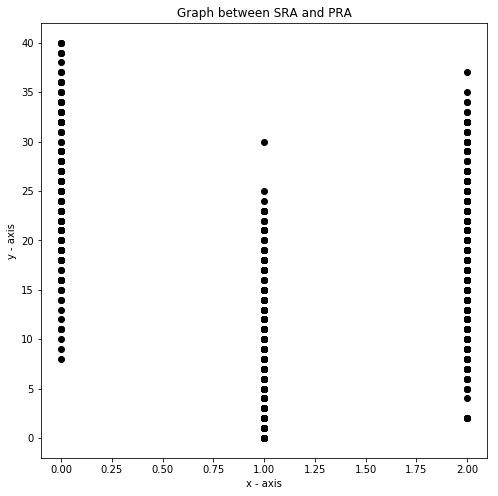

In [4]:
df['professional_risk_evaluation']=df['professional_risk_evaluation'].astype('category').cat.codes
df['sum_all_risk_items']=df['sum_all_risk_items'].astype('category').cat.codes
a = df['sum_all_risk_items'].corr(df['professional_risk_evaluation'])

print("Correlation coefficient between the two variables is ",a)
pra = []
sra = []
for idx,val in enumerate(df['professional_risk_evaluation']):

    pra.append(val)
    sra.append(df['sum_all_risk_items'][idx])
    

    
plt.figure(figsize=(8,8))
plt.plot(pra, sra,'o', color='black') 
  
# naming the x axis 
plt.xlabel('x - axis') 
# naming the y axis 
plt.ylabel('y - axis') 
  
# giving a title to my graph 
plt.title('Graph between SRA and PRA') 
  
# function to show the plot 
plt.show() 

<h1> There is a weak postive correlation between the two columns(close to zero). A correlation coefficient close to zero implies that the two variables have little to no linear relationship or dependence. Note that the two variables could be related or dependent in a nonlinear way. </h1>

<h1> Question 2 Part(e) </h1>

In [228]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.preprocessing import label_binarize


In [229]:
def compare_histograms(scores1, scores2, title, label1='Recidivists', label2='Non recidivists'):
    plt.figure(figsize=(10,6))
    plt.hist(scores1, histtype='step', label=label1, density=True, color='red')
    plt.hist(scores2, histtype='step', label=label2, density=True, color='blue')
    plt.legend(loc='upper right', fontsize='x-large')
    plt.ylabel('Probability')
    plt.xlabel(title)
    plt.show()

In [230]:
def draw_roc_curve( ground_truth, predictions, pos_label="Yes"):
    fpr, tpr, thresholds = roc_curve(ground_truth, predictions, pos_label=pos_label)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(10,6))
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (AUC = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right", fontsize='x-large')
    plt.show()
    return roc_auc

In [231]:
train, test = train_test_split(df, test_size=0.33)
risk_factor_columns = ["risk01_previous_violence", "risk02_history_nonviolent_offences",
                       "risk03_early_violence_before_14", "risk04_past_intervention_fail",
                       "risk05_self_harm_suicide_attempts", "risk06_violence_at_home",
                       "risk07_childhood_mistreatment", "risk08_criminal_parent_caregiver",
                       "risk09_early_separation_parents", "risk10_poor_school_achievement", 
                       "risk11_delinquency_peer_group", "risk12_rejection_peer_group",
                       "risk13_poor_stress_coping", "risk14_poor_parental_skills_parents",
                       "risk15_lack_of_personal_social_support", "risk16_marginalized_environment",
                       "risk17_negative_attitudes", "risk18_risk_taker_impulsive",
                       "risk19_drug_abuse", "risk20_anger_management_issues",
                       "risk21_low_empaty", "risk22_attention_deficit",
                       "risk23_poor_compliance_interventions", "risk24_low_commitment_school"]

protective_factor_columns = ["protective01_prosocial_activities", "protective02_strong_social_support",
                             "protective03_strong_link_prosocial_adult", "protective04_positive_attitude_interventions",
                             "protective05_high_commitment_school_or_work", "protective06_perseverant_personality"]
demographic_columns = ["gender", "nationality", "main_crime_age", "criminal_records",
                       "main_crime_category", "main_crime_is_violent"]

<h1> Naive Bayes </h1>

In [7]:

                       
train_X = pd.get_dummies(train[risk_factor_columns])
train_y = train["recidivism"]

test_X = pd.get_dummies(test[risk_factor_columns])
test_y = test["recidivism"]

In [50]:
model = GaussianNB()
model.fit(train_X, train_y)

GaussianNB(priors=None, var_smoothing=1e-09)

In [55]:
pred24NB_y = model.predict_proba(test_X)[:,1]
pred24NB_recidivists = pred24_y[test_y == 'Yes']
pred24NB_non_recidivists = pred24_y[test_y == 'No']

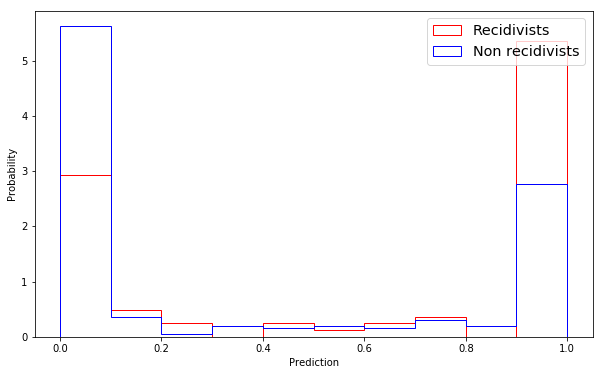

In [56]:
compare_histograms(pred24_recidivists, pred24_non_recidivists, 'Prediction')

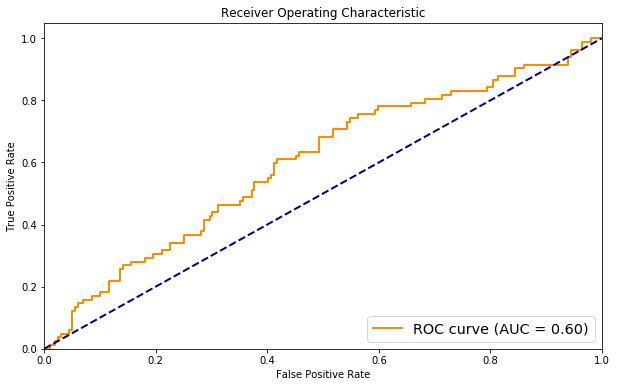

In [58]:
_ = draw_roc_curve(test_y, pred24NB_y)

<h1> Logistic Regression </h1>

In [54]:
model = LogisticRegression(solver='liblinear')
model.fit(train_X, train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [59]:
pred24_y = model.predict_proba(test_X)[:,1]
pred24_recidivists = pred24_y[test_y == 'Yes']
pred24_non_recidivists = pred24_y[test_y == 'No']

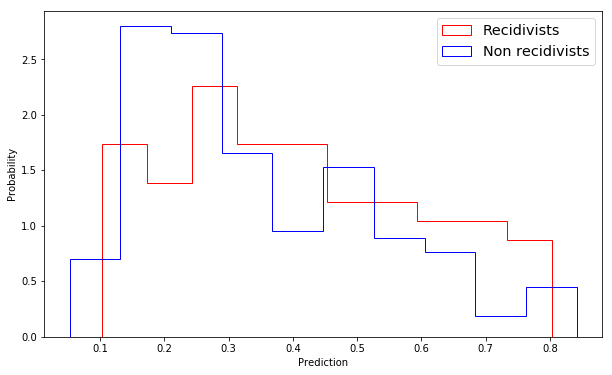

In [60]:
compare_histograms(pred24_recidivists, pred24_non_recidivists, 'Prediction')

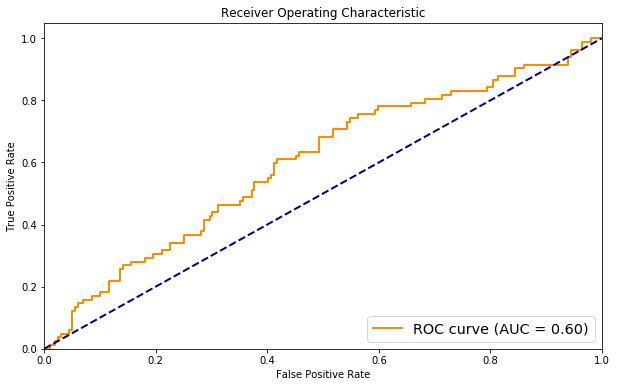

In [61]:
_ = draw_roc_curve(test_y, pred24_y)

<h1> MLP </h1>

In [64]:
model = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1)
model.fit(train_X, train_y)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(5, 2), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=1, shuffle=True, solver='lbfgs', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [65]:
pred24MLP_y = model.predict_proba(test_X)[:,1]
pred24MLP_recidivists = pred24_y[test_y == 'Yes']
pred24MLP_non_recidivists = pred24_y[test_y == 'No']

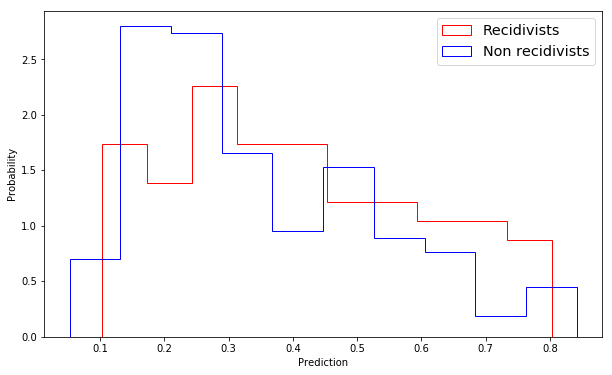

In [66]:
compare_histograms(pred24MLP_recidivists, pred24MLP_non_recidivists, 'Prediction')

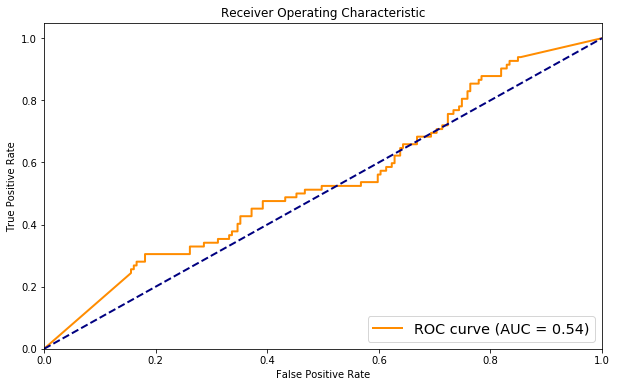

In [67]:
_ = draw_roc_curve(test_y, pred24MLP_y)

<h1> Violent Recidivism Model </h1>

In [429]:
violent_recidivism = []
for var in train['recidivism_violence_first_offence']:
    if var == 'Violent':
        violent_recidivism.append('Yes')
    else:
        violent_recidivism.append('No')
        
train['violent_recidivism'] = violent_recidivism

violent_recidivism = []
for var in test['recidivism_violence_first_offence']:
    if var == 'Violent':
        violent_recidivism.append('Yes')
    else:
        violent_recidivism.append('No')

test['violent_recidivism'] = violent_recidivism
train_X = pd.get_dummies(train[factors])
train_y = train['violent_recidivism']

test_X = pd.get_dummies(test[factors])
test_y = test['violent_recidivism']

/home/saurabh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/saurabh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [430]:
model = LogisticRegression(solver='liblinear')
model.fit(train_X, train_y)
a = model.predict(test_X)
pr = accuracy_score(a,test_y)
print("Accuracy score for Violent Recidivism is", pr)

Accuracy score for Violent Recidivism is 0.9039145907473309


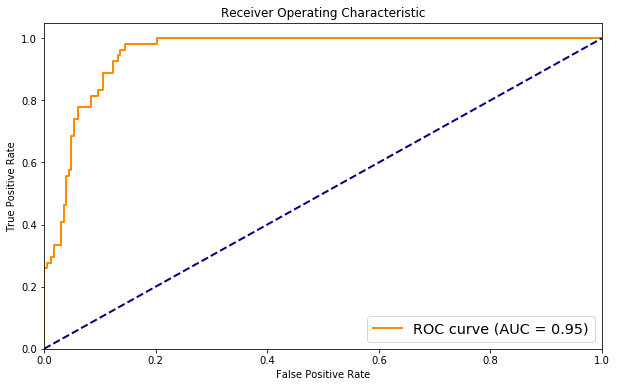

In [431]:
predALL_y = model.predict_proba(test_X)[:,1]
predALL_recidivists = predALL_y[test_y == 'Yes']
predALL_non_recidivists = predALL_y[test_y == 'No']
_ = draw_roc_curve(test_y, predALL_y)

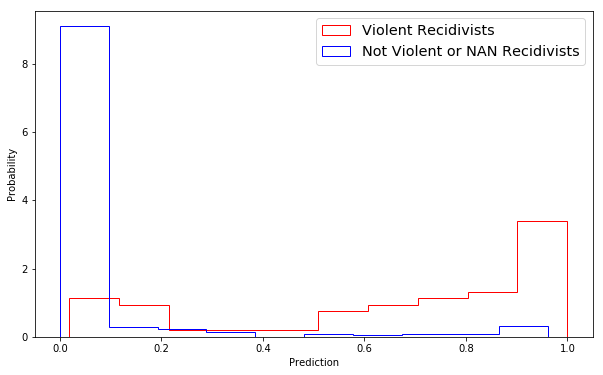

In [432]:
compare_histograms(predALL_recidivists, predALL_non_recidivists, 'Prediction','Violent Recidivists','Not Violent or NAN Recidivists')

<h1> Non Violent Recidivism Model </h1>

In [433]:
non_violent_recidivism = []
for var in train['recidivism_violence_first_offence']:
    if var == 'No violent':
        non_violent_recidivism.append('Yes')
    else:
        non_violent_recidivism.append('No')
        
train['non_violent_recidivism'] = non_violent_recidivism

non_violent_recidivism = []
for var in test['recidivism_violence_first_offence']:
    if var == 'No violent':
        non_violent_recidivism.append('Yes')
    else:
        non_violent_recidivism.append('No')

test['non_violent_recidivism'] = non_violent_recidivism
train_X = pd.get_dummies(train[factors])
train_y = train['non_violent_recidivism']

test_X = pd.get_dummies(test[factors])
test_y = test['non_violent_recidivism']

/home/saurabh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/saurabh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [434]:
model = LogisticRegression(solver='liblinear')
model.fit(train_X, train_y)
a = model.predict(test_X)
pr = accuracy_score(a,test_y)
print("Accuracy score for Non Violent Recidivism is", pr)


Accuracy score for Non Violent Recidivism is 0.7580071174377224


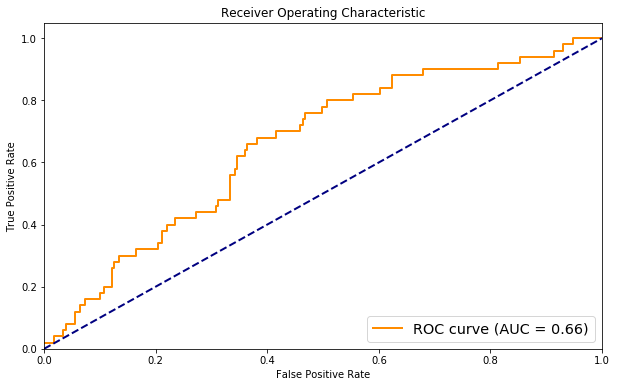

In [435]:
predALL_y = model.predict_proba(test_X)[:,1]
predALL_recidivists = predALL_y[test_y == 'Yes']
predALL_non_recidivists = predALL_y[test_y == 'No']
_ = draw_roc_curve(test_y, predALL_y)

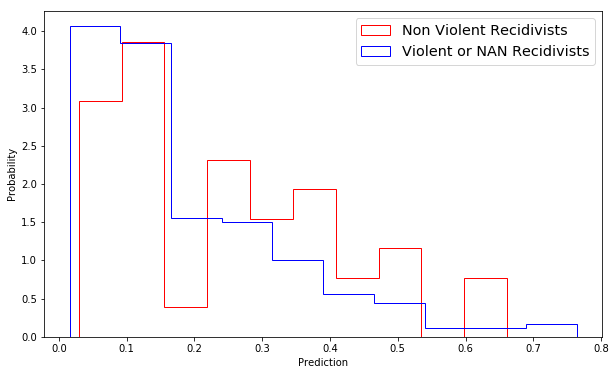

In [106]:
compare_histograms(predALL_recidivists, predALL_non_recidivists, 'Prediction','Non Violent Recidivists','Violent or NAN Recidivists')

<h1> 2 Part(c) </h1>

In [367]:
factors = demographic_columns + risk_factor_columns + protective_factor_columns
factors.append("recidivism_severity")
train_X = pd.get_dummies(train[factors])
train_y = train["recidivism_severity"]

test_X = pd.get_dummies(test[factors])

In [368]:
model = LogisticRegression(solver='liblinear',max_iter=1000)
model.fit(train_X, train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1000, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [369]:
test_y = test["recidivism_severity"]
a = model.predict(test_X)
pr = accuracy_score(test_y,a)

<Figure size 864x720 with 0 Axes>

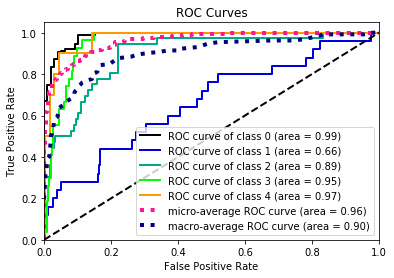

In [395]:
import scikitplot as skplt
predRS_y = model.predict_proba(test_X)
y_true = test_y
y_probas = predRS_y
plt.figure(figsize = (12,10))

skplt.metrics.plot_roc(y_true, y_probas)
plt.show()

In [398]:
print("Prediction using Recidivism Severity : ",pr)

Prediction using Recidivism Severity :  0.797153024911032


<h1> 2 Part(b)</h1>

In [232]:

                       
factors = demographic_columns + risk_factor_columns + protective_factor_columns

train_X = pd.get_dummies(train[factors])
train_y = train["recidivism"]

test_X = pd.get_dummies(test[factors])


In [233]:
model = LogisticRegression(solver='liblinear',max_iter=1000)
model.fit(train_X, train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1000, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [234]:
from sklearn.metrics import accuracy_score
test_X = test_X[test_X['main_crime_category_Others'] == 1]
# test_X1 = test_X[test_X['main_crime_category_Violent against property'] == 1]
# test_X2 = test_X[test_X['main_crime_category_Against persons'] == 1]
# test_X3 = test_X[test_X['main_crime_category_Others'] == 1]

pr = model.predict(test_X)
# pr1 = model.predict(test_X1)
# pr2 = model.predict(test_X2)
# pr3 = model.predict(test_X3)

test_y = test[test['main_crime_category'] == 'Others']
test_y = test_y["recidivism"]
test_y = np.array(test_y).reshape(-1,1)

# test_y1 = test[test['main_crime_category'] == 'Violent against property']
# test_y1 = test_y1["recidivism"]
# test_y1 = np.array(test_y1).reshape(-1,1)

# test_y2 = test[test['main_crime_category'] == 'Against persons']
# test_y2 = test_y2["recidivism"]
# test_y2 = np.array(test_y2).reshape(-1,1)

# test_y3 = test[test['main_crime_category'] == 'Others']
# test_y3 = test_y3["recidivism"]
# test_y3 = np.array(test_y3).reshape(-1,1)


score = accuracy_score(test_y, pr)
# score[1] = accuracy_score(test_y1, pr1)
# score[2] = accuracy_score(test_y2, pr2)
# score[3] = accuracy_score(test_y3, pr3)


In [348]:
scores = dict()
scores['Non Violent against Property'] = 0.71
scores['Violent Against Property'] = 0.66
scores['Against Persons'] =0.66
scores['Others'] = 0.78

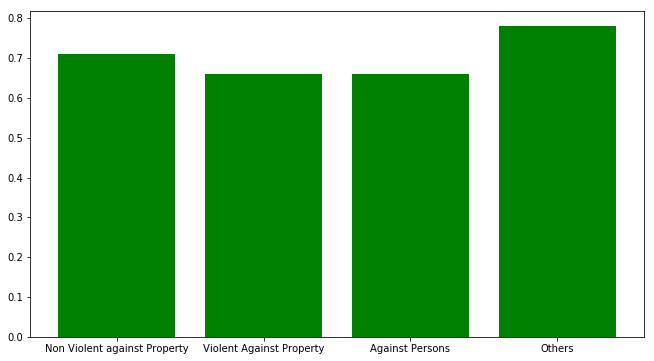

In [354]:
plt.figure(figsize = (11,6))
plt.bar(scores.keys(),scores.values(),color = 'green')
plt.show()

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1000, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [365]:
a


array([3, 0, 3, 0, 0, 2, 0, 0, 0, 3, 0, 0, 1, 0, 0, 3, 0, 2, 0, 0, 0, 2,
       0, 0, 0, 0, 3, 2, 2, 0, 0, 0, 0, 2, 2, 0, 0, 1, 0, 0, 0, 3, 0, 0,
       0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 3, 0, 0, 3,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 0, 3, 3, 2, 2, 0, 0, 0, 3, 0, 0,
       0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 1, 0, 0, 0,
       0, 0, 3, 0, 0, 0, 2, 0, 0, 0, 3, 3, 2, 3, 0, 1, 0, 0, 0, 0, 0, 0,
       3, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 3, 0, 0, 3, 0, 0, 0, 3, 0, 0, 2,
       0, 1, 0, 0, 0, 1, 0, 3, 0, 0, 3, 0, 0, 0, 0, 0, 3, 0, 3, 0, 0, 3,
       0, 1, 0, 0, 3, 0, 3, 0, 0, 0, 2, 0, 0, 0, 0, 2, 3, 3, 0, 2, 0, 0,
       2, 0, 0, 3, 0, 0, 2, 0, 0, 0, 3, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 3, 4, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       3, 0, 0, 0, 0, 2, 0, 3, 0, 0, 0, 0, 0, 3, 3, 3, 3])

In [366]:
test_X["recidivism_severity"]

456    4
291    0
162    3
663    0
380    0
82     1
674    0
311    1
443    0
65     2
524    0
115    0
368    1
421    0
400    0
780    4
687    0
639    2
267    0
197    0
6      0
660    2
62     0
817    0
501    0
848    0
725    4
420    3
64     2
614    1
      ..
296    0
262    0
586    0
529    0
87     3
507    0
304    0
51     0
458    0
31     0
364    0
208    0
142    0
646    3
341    0
709    0
56     0
300    1
538    4
347    0
716    3
222    0
326    0
789    0
587    0
479    1
120    3
732    2
426    3
299    2
Name: recidivism_severity, Length: 281, dtype: int64